<a href="https://colab.research.google.com/github/luca2618/COMP550_project/blob/main/data/load_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
### importing libraries

# basic libraries
import pandas as pd
import math
import matplotlib.pyplot as plt

# to download files
from google.colab import files

## Helper functions

In [20]:
def create_histograms(x, title):
  mean = sum(x)/len(x)

  # plots histogram
  plt.hist(x, color="#8ad07c")
  #ax.bar(range_arr, count_arr, width = 5)
  plt.title(title)
  plt.xlabel("Review count")
  plt.ylabel("Novel count")
  plt.axvline(x = mean, color = 'r', linestyle = '-', label = "Mean = " + str(round(mean, 2)))
  plt.legend(loc = "upper right")

  plt.show()

# Importing dataset

In [ ]:
# cloning github repo
!git clone https://github.com/luca2618/COMP550_project

Cloning into 'COMP550_project'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 25 (delta 1), reused 5 (delta 1), pack-reused 17
Receiving objects: 100% (25/25), 135.51 MiB | 34.20 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [ ]:
# unzipping dataset and saving it in a dataframe
!unzip COMP550_project/data/goodreads_reviews_dataset.csv.zip

Archive:  COMP550_project/data/goodreads_reviews_dataset.csv.zip
  inflating: goodreads_reviews_dataset.csv  


In [ ]:
reviews_df = pd.read_csv('goodreads_reviews_dataset.csv')

# Data overview

In [ ]:
### counting genders of protagonists

genders = reviews_df['PROTAGONIST'].values.tolist()

print(f'Female-led: {genders.count("F")}')
print(f'Male-led: {genders.count("M")}')
print(f'Other: {genders.count("Various (M and F)")}')

print(f'\nTotal reviews: {len(genders)}')

Female-led: 154847
Male-led: 40102
Other: 26810

Total reviews: 221759


In [ ]:
### counting reviews per novel

reviews_per_novel = {}
all_novels = reviews_df['BOOK_TITLE'].values.tolist()
unique_novels = set(all_novels)

# iterates through unique novels
for novel in unique_novels:
  reviews_per_novel[novel] = all_novels.count(novel)

# prints total unique novels and average # of reviews per total
print(f'Total novels: {len(unique_novels)}')
print(f'Average # of reviews per novel: {round(sum(reviews_per_novel.values())/len(unique_novels), 2)}\n')

# prints each novel's review count
for novel in reviews_per_novel:
  print(f'{novel}: {reviews_per_novel[novel]}')

Total novels: 134
Average # of reviews per novel: 1654.92

Cress: 2147
Ignite Me (Shatter Me, #3): 1270
Thirteen Reasons Why: 443
An Abundance of Katherines: 1358
Requiem: 1142
Where She Went: 1627
Days of Blood & Starlight: 1058
Hopeless: 2059
The Hate U Give: 1176
The Crown: 802
Red Queen: 1192
Illuminae: 1554
Eclipse: 1693
Vampire Academy: 1248
Aristotle and Dante Discover the Secrets of the Universe: 1754
The Unbecoming of Mara Dyer: 903
The Lightning Thief: 2495
Pandemonium: 1148
The Mark of Athena: 916
City of Glass: 1918
The Death Cure: 1327
The Wrath & the Dawn: 1362
Before I Fall: 1430
Clockwork Princess: 1077
The Raven Boys: 1559
Eleanor & Park: 4079
Matilda: 577
The DUFF: Designated Ugly Fat Friend: 1187
City of Ashes: 1855
The Maze Runner: 3067
Obsidian: 1584
Holes: 622
Paper Towns: 2194
Divergent: 5105
Allegiant: 3299
The Winner's Curse: 1022
The Absolutely True Diary of a Part-Time Indian: 1143
Matched: 2104
The Knife of Never Letting Go: 937
The Scorch Trials: 1549
Me an

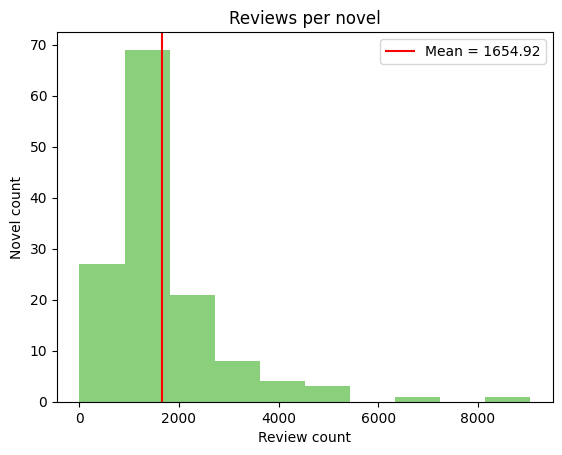

In [21]:
### creating histogram of reviews per novel

create_histograms([reviews_per_novel[key] for key in reviews_per_novel.keys()], 'Reviews per novel')

# Saving files

In [ ]:
### downloading dataset

# can change this if you wish
filename = 'goodreads_reviews_dataset.csv'

reviews_df.to_csv(filename, index = False)
files.download(filename)